In [14]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import graphviz


In [15]:
df = pd.read_csv('..\documents\generated\df_inicial_3%.csv', low_memory=False)
display(df)

,subject_id,charttime_chartevent,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,...,race,admission_location,age,charttime_labevent,value_labevent,valuenum_labevent,valueuom_labevent,priority,admittime,time_since_admission_labevent
0,10036156,2157-07-02 04:00:00,92,92.0,%,O2 Saturation Pulseoxymetry Alarm - Low,Alarms,23.133333,2724,URGENT,...,UNKNOWN,TRANSFER FROM HOSPITAL,88,2157-07-02 04:07:00,12,12.0,mEq/L,ROUTINE,2157-07-01 04:52:00,23.250000
1,10011398,2146-12-16 05:00:00,Sharp,NaN,Unknown,Pain Type,Pain/Sedation,21.750000,2724,SURGICAL SAME DAY ADMISSION,...,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,2146-12-16 02:21:00,3.2,3.2,mg/dL,STAT,2146-12-15 07:15:00,19.100000
2,10018845,2184-10-08 04:38:00,Normal for Race,NaN,Unknown,Skin Color,Skin - Assessment,2.166667,2724,EW EMER.,...,WHITE,EMERGENCY ROOM,91,2184-10-08 20:37:00,NaN,NaN,Unknown,STAT,2184-10-08 02:28:00,18.150000
3,10018081,2133-12-19 12:26:00,Swab,NaN,Unknown,Oral Care,Treatments,19.466667,2724,EW EMER.,...,WHITE,EMERGENCY ROOM,79,2133-12-18 17:28:00,5.1,5.1,mg/dL,ROUTINE,2133-12-18 16:58:00,0.500000
4,10018081,2133-12-19 06:00:00,2 rails up,NaN,Unknown,Side Rails,Restraint/Support Systems,13.033333,2724,EW EMER.,...,WHITE,EMERGENCY ROOM,79,2133-12-18 17:28:00,13.9,13.9,%,ROUTINE,2133-12-18 16:58:00,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358190,10019003,2153-03-28 19:00:00,97,97.0,%,O2 saturation pulseoxymetry,Respiratory,19.583333,Z87891,EW EMER.,...,WHITE,EMERGENCY ROOM,70,2153-03-28 14:04:00,30,30.0,mg/dL,ROUTINE,2153-03-27 23:25:00,14.650000
358191,10023117,2175-07-07 00:00:00,Regular,NaN,Unknown,Breathing pattern/effort,Pulmonary,8.050000,Z87891,OBSERVATION ADMIT,...,WHITE,EMERGENCY ROOM,58,2175-07-06 18:37:00,1.9,1.9,mg/dL,STAT,2175-07-06 15:57:00,2.666667
358192,10023117,2175-03-21 16:00:00,Obeys Commands,6.0,Unknown,GCS - Motor Response,Neurological,16.516667,Z87891,OBSERVATION ADMIT,...,WHITE,TRANSFER FROM HOSPITAL,58,2175-03-21 09:03:00,NaN,NaN,mg/dL,ROUTINE,2175-03-20 23:29:00,9.566667
358193,10023117,2175-03-21 07:17:00,35,35.0,mmHg,Pulmonary Artery Pressure Alarm - High,Alarms,7.800000,Z87891,OBSERVATION ADMIT,...,WHITE,TRANSFER FROM HOSPITAL,58,2175-03-21 09:03:00,NaN,NaN,Unknown,ROUTINE,2175-03-20 23:29:00,9.566667


In [16]:
# drop of tables
df = df.drop(columns=['subject_id','charttime_chartevent', 'charttime_labevent', 'admittime'])

In [18]:
df_filtered = df[df[['valuenum_chartevent', 'valuenum_labevent', 'valueuom_labevent']].notna().all(axis=1)]

In [19]:
min_count = df_filtered['icd_code'].value_counts().min()
print(min_count)

8209


In [20]:
# 6200 for every sigle icd_code (6)
min_count = 6200

df_sample = df_filtered.groupby('icd_code', group_keys=False).sample(n=min_count, random_state=42)
display(df_sample)

,value_chartevent,valuenum_chartevent,valueuom_chartevent,label_chartevent,category,time_since_admission_chartevent,icd_code,admission_type,insurance,race,admission_location,age,value_labevent,valuenum_labevent,valueuom_labevent,priority,time_since_admission_labevent
39375,103,103.0,°F,Temperature Fahrenheit,Routine Vital Signs,4.850000,2724,EW EMER.,Medicaid,UNABLE TO OBTAIN,EMERGENCY ROOM,60,-3,-3.00,mEq/L,Unknown,12.316667
17063,25,25.0,mEq/L,TCO2 (calc) Arterial,Labs,7.900000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,1.4,1.40,Unknown,STAT,4.150000
60766,25,25.0,mA,Temporary Ventricular Stim Setting mA,Cardiovascular (Pacer Data),16.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,384,384.00,mm Hg,Unknown,5.616667
12851,36.8,36.8,°C,Temperature Celsius,Routine Vital Signs,18.750000,2724,SURGICAL SAME DAY ADMISSION,Other,HISPANIC OR LATINO,PHYSICIAN REFERRAL,67,98,98.00,%,Unknown,6.666667
42526,100,100.0,%,O2 saturation pulseoxymetry,Respiratory,22.750000,2724,ELECTIVE,Medicare,WHITE,PHYSICIAN REFERRAL,70,1.2,1.20,Unknown,ROUTINE,15.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332555,0 Alert and calm,0.0,Unknown,Goal Richmond-RAS Scale,Pain/Sedation,3.583333,Z87891,EW EMER.,Other,WHITE,EMERGENCY ROOM,70,___,36.00,mm Hg,Unknown,4.133333
320850,127,127.0,bpm,Heart Rate,Routine Vital Signs,21.800000,Z87891,URGENT,Medicare,UNKNOWN,TRANSFER FROM HOSPITAL,81,38.2,38.20,%,ROUTINE,18.600000
336918,475,475.0,mL,Tidal Volume (observed),Respiratory,23.516667,Z87891,OBSERVATION ADMIT,Medicare,WHITE,TRANSFER FROM HOSPITAL,58,71,71.00,fL,STAT,15.233333
312004,12,12.0,insp/min,Respiratory Rate,Respiratory,11.916667,Z87891,SURGICAL SAME DAY ADMISSION,Medicare,WHITE,PHYSICIAN REFERRAL,72,7.37,7.37,units,Unknown,16.300000


                                 Missing  Percent (%)
value_chartevent                       0          0.0
valuenum_chartevent                    0          0.0
valueuom_chartevent                    0          0.0
label_chartevent                       0          0.0
category                               0          0.0
time_since_admission_chartevent        0          0.0
icd_code                               0          0.0
admission_type                         0          0.0
insurance                              0          0.0
race                                   0          0.0
admission_location                     0          0.0
age                                    0          0.0
value_labevent                         0          0.0
valuenum_labevent                      0          0.0
valueuom_labevent                      0          0.0
priority                               0          0.0
time_since_admission_labevent          0          0.0


<Axes: >

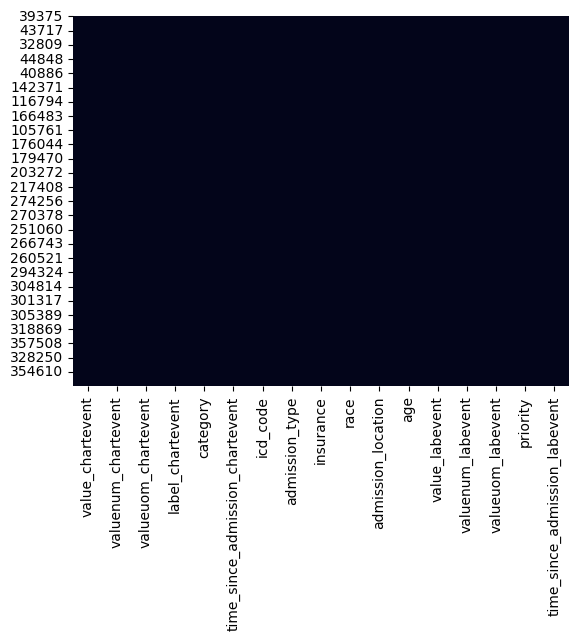

In [21]:
missing = df_sample.isnull().sum()
missing_percent = (missing / len(df_sample)) * 100
print(pd.DataFrame({"Missing": missing, "Percent (%)": missing_percent}))

sns.heatmap(df_sample.isnull(), cbar=False)

In [22]:
df_sample.to_csv("df_balanced_full.csv", index=False)